In [15]:
import torch
from torch import nn
import matplotlib.pyplot as plt
torch.__version__

'1.12.1+cu116'

In [16]:
#Creating our data
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

In [17]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [18]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    plt.figure(figsize=(10,7))
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
    plt.legend()
    

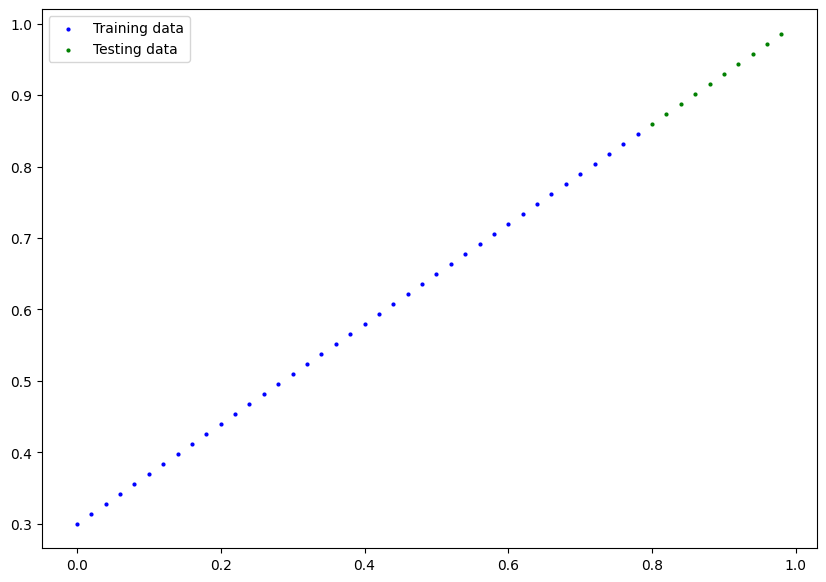

In [19]:
plot_predictions()

In [20]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True,
                                                dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True,
                                                dtype=torch.float))
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias
    

In [21]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.001)

In [22]:
epochs = 1700
epoch_count = []
loss_values = []
test_loss_values = []


for epoch in range(epochs):
    model_0.train()
    y_pred = model_0(X_train)
    loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    model_0.eval()
    with torch.inference_mode():
        test_pred = model_0(X_test)
        test_loss = loss_fn(test_pred, y_test)
    if epoch % 100 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Loss: 0.0003177322505507618 | Test loss: 0.0006393313524313271
Epoch: 100 | Loss: 0.0004444979131221771 | Test loss: 0.0005780101055279374
Epoch: 200 | Loss: 0.0004444979131221771 | Test loss: 0.0005780101055279374
Epoch: 300 | Loss: 0.0004444979131221771 | Test loss: 0.0005780101055279374
Epoch: 400 | Loss: 0.0004444979131221771 | Test loss: 0.0005780101055279374
Epoch: 500 | Loss: 0.0004444979131221771 | Test loss: 0.0005780101055279374
Epoch: 600 | Loss: 0.0004444979131221771 | Test loss: 0.0005780101055279374
Epoch: 700 | Loss: 0.0004444979131221771 | Test loss: 0.0005780101055279374
Epoch: 800 | Loss: 0.0004444979131221771 | Test loss: 0.0005780101055279374
Epoch: 900 | Loss: 0.0004444979131221771 | Test loss: 0.0005780101055279374
Epoch: 1000 | Loss: 0.0004444979131221771 | Test loss: 0.0005780101055279374
Epoch: 1100 | Loss: 0.0004444979131221771 | Test loss: 0.0005780101055279374
Epoch: 1200 | Loss: 0.0004444979131221771 | Test loss: 0.0005780101055279374
Epoch: 1300

In [23]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2998]))])

In [24]:
from pathlib import Path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
MODEL_SAVE_PATH

torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

print("Model saved to:", MODEL_SAVE_PATH)


In [25]:
loaded_model_0 = LinearRegressionModel()
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>